* [CNN Architecture3](#CNN-Architecture3)
    * [ResNet](#ResNet)
    * [ Deep Learning Performance](#Deep-Learning-Performance)
         * [1.Batch-Normalization](#1.Batch-Normalization)
         * [2.Dropout](#2.Dropout)


   
## CNN Architecture3

ConvNet(Convolution Neural Network) 구성요소
1. convolution
    - transitional invariant(위치와 무관하게 특정 특성 파악)
        - **data augmentation** 회전, 크기를 탐지 잘 못하기 땨문에 으로 학습함
        - rotation invariant, scale invariant 모델도 있으나 일반적이지 않음
    -  **locally connected shared weights**
        - 학습할 파라미터가 줄어듦
        - 기존의 딥뉴럴네트워크는 위치에 민감함
2. pooling
    - 대표값으로 바꾸어 크기를 줄이고 특성 유지
    - Avg Pooling, Max Pooling
    - 안쓰는 경향이 있음
3. Fully connected
    -  **Global Avg Pooling** 2013 NIN, GooLeNet
4. Activation function
    - **non-linearity** 비선형 
        - 데이터 왜곡
        - 2012 AlexNet:ReLu -> 기본이 됨 
5. Normalization
    - input  eg. MinMaxScaler
    - **batch normalization**
---

## ResNet 
- 데이터 증강 수십배로 함
- Kaiming He 152개로 아주 딥하게 되어 2015년에 인간을 넘어섬
 - 논문: Deep Residual Learining for Image Recognition
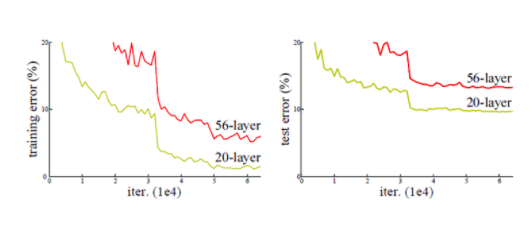
- 레이어가 깊어지면서  degradation or gradient vanishing/exploding 으로 인해 traing & test error가 모두 좋지 않은(큰)문제를 해결하기 위해 해결책
     - **degradation** :같이 떨어지니 학습인 안 되는 underfitting 문제
          A. input normarlization
          B. small learning rate
          C. ReLu
          A. Residual Learning + shortcut connection
          B. paramter 초기값 설정 방법
          C. Batch Normalization

####  1. Residual Learning
- Residual: 출력과 입력의 차이가 0이 되도록 학습 방향을 결정하여 학습
    - $F(x) = H(x)-x$=0 (최적)
    - $H(x)=F(x)+x$
- Residual Block weight layer 통해 나온 결과와 그전 결과 x를 더하고  relu를 하면 바뀐 값을 합쳐서 다름 레이어의 input 
- activation으로 변화된 값과 원래의 값을 더해서 유지
- skip connection: identity
    - 연산 증가 없어 쉽게 최적화
    > LSTM 아이디어 : RNN에서 지나갈수록 앞의 값들 state 전달이 되지 않아서 저장 셀 만듦
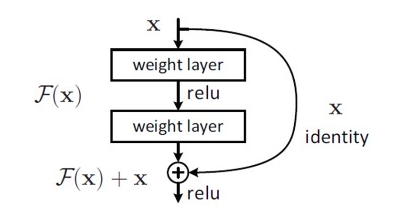
- 2개의 convolution layer 마다 skip connection

- deeper bottleneck architecture
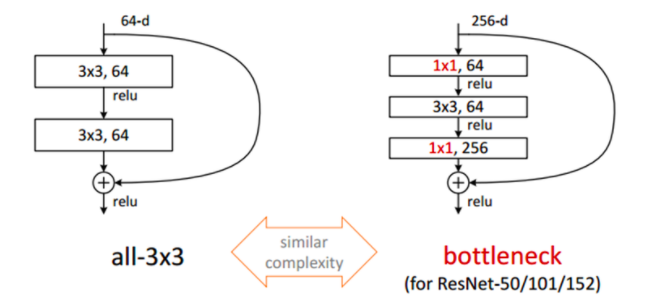
- 1x1 convolution로 차원축소후 다시 차원 확대하여 연산량 절감
- 152개의 레이어를 깊게 쌓아도 학습이 잘됨
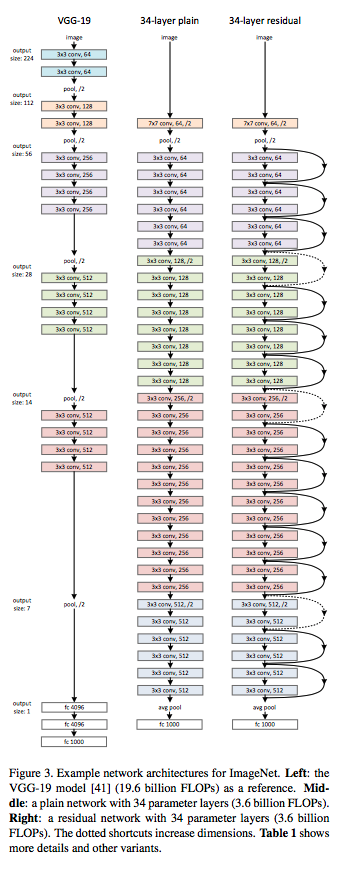
다양한 구조 실험
- VGG 기반
- kernel size 3,3
    - feature map동일한 경우 동일한 수의 filter 유지 
    - feature map이 작아지는 경우 filter수를 2배로 늘림
- max-pooling, dropout, regularization 적용 안함
    - pooling대신 stride 키워서 대신

- PReLu-net:  Gaussian distribution 기반 weight initializer -> Xavier initializer
- 현존 최고의 기술 State-of-the-art Methods:VGG, GoogLeNet, BN-inception << ResNet
- optimization : learning rate decay 작은 값으로 변경함 
- 초기값.
####  activation funciton 
 activation funciton 의 위치 영향 비교
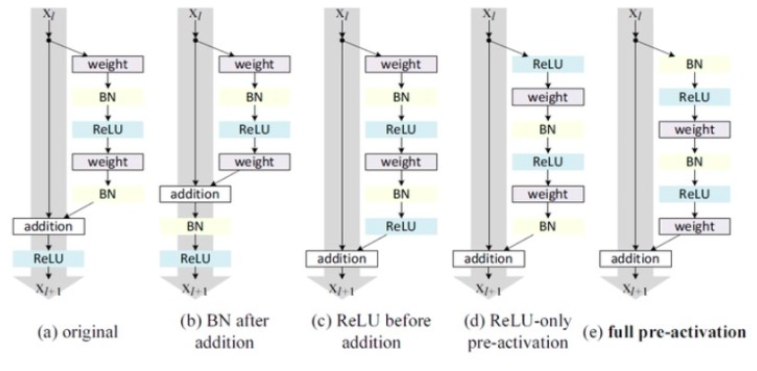
- original이 train,test 성능 좋음
- localization, detection에서도 효과적

0 underfitting/ overfitting 확인
 학습 안 되는 경우 해결법
1. 활성함수: sigmoid, tanh쓰면 gradient vanishing문제가 생겨서 학습이 안 됨 => ReLu
2. loss는 문제 도메인 따라 정해지지만 optimizer(loss function을 다양한 gradeint 방식으로 학습여부가 달라짐)는 지정
  - Adam, Rectified Adam..
3. 전처리: 정규화(normalization)
  - layers 깊어지면 weight,bias weight,bias 때문에 layer에서 나온 output값 범위/분포가 계속 바뀌게 되어서 feed forward 로 누적되어서 학습이 안되는 경우가 있음

  - SGD mini batch 기반으로 batch 사이즈 만큼 학습하고 가중치 업데이트
      > 수학문제 몇문제씩 보고 답보고 풀지
  - batch size만큼 normalization 했더니 안정적이라서 깊은 네트워크 모델 학습 잘되도록 함
    - regularization역할을 해서 드롭아웃 대신할 수 있어 많이 사용됨
  - 작은 학습률 사용하는 이유(오버슈팅 방지)


  - 데이터 분포가 크게 
## Deep Learning Performance

- Batch Normalization
- Dropout
- train with noise


## Stability
 underfitting
- 모델 깊어지면 degradation으로 학습이 안되어 (underfitting)
    - Gradient vanishing
      - 미분하면 끝단 값이 0에 가까워서 사라지게 되어 학습이 잘 안됨(saturation)
    - Gradient exploding
      - 누적되어서 너무커지게 되어 발산하면서 loss 최소화 불가.

 1. 데이터 전처리
 2. 활성화 함수 relu
 3. optimizer
 4. gradient clipping
 5. small learning rate
    - 크면 overshooting
 6. weight initialization
    - 초기값  
 7. **normalization**


#### Internal Covariate Shift Prob
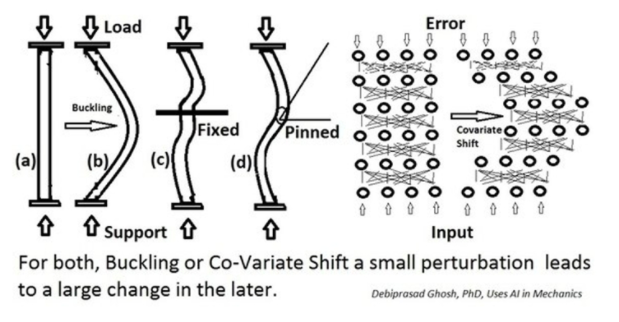
건축에서 하중에 의해서 기둥의 휘어지는(buckling)현상에 비유한 각 레이어의 input의 distribution이 달라지는 현상을 안정화함
  - 가중치가 업데이트 될때마다 각 mini-batch의 input의 분포가 계속 달라지기 때문에 학습이 잘 안됨
  - 전통적인 방법: 누적되서 **범위 한정시켜서** 잘 못 된것을 고쳐줌 - 어떤 범위에서 이 이상 증가 못하게 막는 함수를 
  - 분산이 커지면 값 전달 안되는 경우 있음
  
A. Whitening 
  - input feature uncorrelated 하게 만들고 각가의 평균 0, 분산 1로 바꿔주는(표준화) 작업
    - 연산량 복잡, 0을 중심으로 만들면 영향력이 사라지는 경우가 있음.
    $z= \frac {x-mean}{variance}$
    - bias 가 없어지게됨
    x= mean+bias
    
B. Batch Normalization
## 1.Batch Normalization
 - regularization
 - standardizing input of layer for each mini batch

- 2015년 등장,레이어가 많은 메이저 모델은 다 적용하기 시작
> 논문 : Batch Normalization: Accelerating Deep Network Traning by Reducing Internal Covariage Shift
- GPU 효율적 사용을 위해서 32~256 크기 갖는 mini-batch 이용
- SGD : hyperparameter learning rate, 초기값 설정 중요
  - 학습시에 신경망 내에서 평균0, 분산1인 분포로 정규화 조절하고 scale shift함
  - Normalization을 전체데이터에 하는것이 아닌 mini-batch 기반으로 적용
       - correlation 작어서(공분산 작게) 전체 집합을 대표할 수 있도록
  - 위치: FCNN - BN - Activation
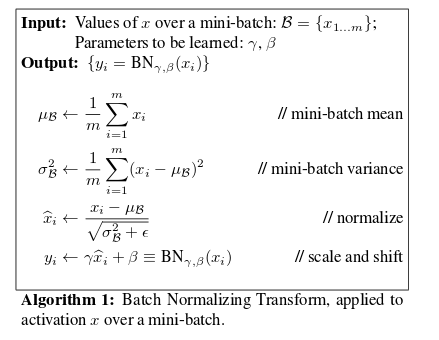

  1. mini-batch 평균 $\mu$
  2. mini-batch 분산 $\sigma ^2$
  3. 표준화 $\hat{x}$ 
     - epsilon 더해서 안정성 높임
  4. **scale($\gamma)$ & shift($\beta$)** $\gamma x + \beta$
     - 정규화를 다시 되돌리는 idntity mapping 가능 
     - batch size 클수록 batch normalization 
       - 학습: 긱 mini-batch 의 평균, 분산 구해서 $\gamma, \beta$구함
       - 테스트: 학습통해 구한 $\gamma, \beta$  각 batch 평균 + 이동평균  
       - 학습 ,사용 다름 (linear operator)
    - 큰 learning rate 사용해도 안정성 때문에 빠르게 수렴 가능
    - weight 초기값에 덜 민감함(robust)
    - regularizatoin 역할(drop out 효과)
    - overhaed 없어 ConvNet과 같이 사용 가능
      - 이후 weight, layer ,instance, group Normalization 확장
      
 참고: https://www.srose.biz/wp-content/uploads/2020/08/Deep-Learning-Performance-Part-3-Batch-Normalization-Dropout-Noise.html
 
 
### Normalization
Normalization(featrue scaling)
- 특성 스케일 조정하여(특성 어느정도 유지) 값 범위의 차이를 왜곡시키지 않고 데이터 세트를 공통 스케일로 변경
  - 값 범위가 크면 큰 영향이 있어서 범위 조절 필요함
  
### Standardization 
- z-score normalization 
- 평균0 ,표준편차1 인 분포를 따름

### Regularization
- 모델의 설명 유지ㅡ 모델 복잡도를 줄임
  - early stopping, noisy input, drop out, pruning, feature selection, ensemble
- 일반화된 모델


### inputs Normalization 
- 각 범위가 작으면 gradient descent algorithm 적용 어려움
- 학습이 빠르게 최적화 지점 찾음
  - MinMaxScaler 예. 1/255
- 안되는 경우도 있음

- 깊어져도 학습이 가능해지게 됨

>  2016 Hinton layer normalizaiton
  ... weight, instance,group normalization

> 논쟁
  - 2015 BN가 Covariance Shift 줄임(분포가 변하는 문제 해결)
  - 2018 MIT 결과는 동일하나 covariance shift와 상관이 없을음 밝힘

In [1]:
import tensorflow as tf

In [2]:
tf.keras.layers.BatchNormalization(momentum=0) 
# momentum: 업데이트한것이  이전 mini-batch 계산한 것을 얼마만큼 포함할것인지 0~1 사이의 값으로 

In [ ]:
#MLP 
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
#CNN Batch Normalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dense(1))

In [ ]:
#RNN Batch Normalization
from keras.layers import LSTM

model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dense(1))

In [ ]:
tf.keras.layers.LocallyConnected2D
tf.keras.layers.Conv2D


kernel,bias = resnet.get_layer('conv4_block1_1_conv').weights #len ( 64 kernel(weigths) , bias)
kernel
kernel.numpy().shape, bias.numpy().shape 
resnet.get_layer('conv4_block1_1_conv').weights[0].numpy()[...,0] 
import matplotlib.pyplot as plt
plt.imshow(resnet.get_layer('conv5_block3_3_conv').weights[0].numpy()[...,31]) 
#이미지 넣어서 나온게 feature map

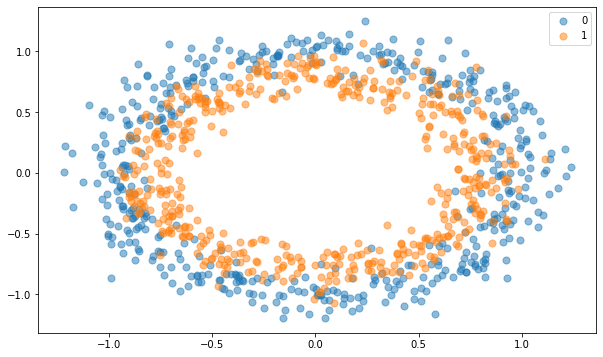

In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# generate 1000 circles : 500 train, 500 test
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

fig, ax = plt.subplots(figsize=(10,6))

# select indices of points with each class label
for i in range(2):
    samples_ix = np.where(y == i)
    plt.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i), s=50, alpha=0.5)
    
plt.legend()
plt.show()

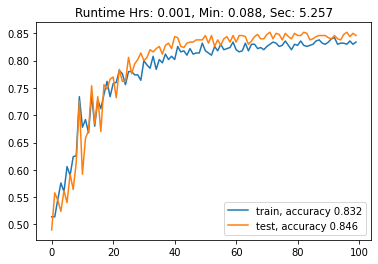

In [8]:
# MLP 

from keras.optimizers import SGD
import time
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential


# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
end_time = time.time() - start_time
min_ = end_time/60
hrs = min_/60

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

# plot history
plt.plot(history.history['accuracy'], label=f'train, accuracy {round(train_acc, 3)}')
plt.plot(history.history['val_accuracy'], label=f'test, accuracy {round(test_acc, 3)}')
plt.title(f'Runtime Hrs: {round(hrs,3)}, Min: {round(min_,3)}, Sec: {round(end_time,3)}')
plt.legend()
plt.show()

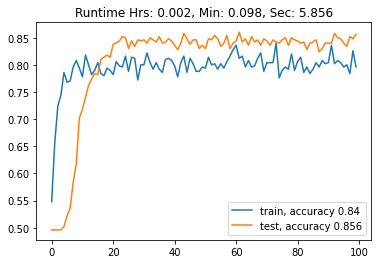

In [9]:
# MLP With Batch Normalization
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
end_time = time.time() - start_time
min_ = end_time/60
hrs = min_/60

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

# plot history
plt.plot(history.history['accuracy'], label=f'train, accuracy {round(train_acc, 3)}')
plt.plot(history.history['val_accuracy'], label=f'test, accuracy {round(test_acc, 3)}')
plt.title(f'Runtime Hrs: {round(hrs,3)}, Min: {round(min_,3)}, Sec: {round(end_time,3)}')
plt.legend()
plt.show()
# Beta,Gamma, Momentum, input layer 테스트 해보기

## 2.Dropout
- 모델의 복잡성에 비해서 데이터가 부족하면 overfitting 현상 때문에 NN에서 **학습하는 동안 랜덤하게 노드를 drop out**해서 효과적으로 **regularization**
    - inverse dropout : mini-batch에서 weight update 후에 weights rescaling 함
- noise 효과 
-  레이어별로 적용하며 input, hidden layer에 적용함
- Dropout rate 0.5 ~ 0.8 



In [11]:
from keras.layers import Dropout
Dense(32)
Dropout(0.5) # 50% 
Dense(32)

In [14]:
from keras.layers import SpatialDropout2D,Conv2D,MaxPooling2D

Conv2D(32, (3,3))
Conv2D(32, (3,3))
SpatialDropout2D(0.5)
MaxPooling2D()
Dense(1)

In [15]:
from keras.layers import LSTM

LSTM(32)
Dropout(0.5)
Dense(1)


LSTM(32, dropout=0.5, recurrent_dropout=0.5)
Dense(1)

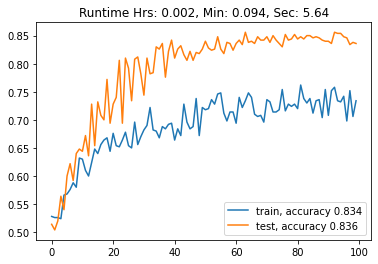

In [16]:
# MLP With Drop out
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
end_time = time.time() - start_time
min_ = end_time/60
hrs = min_/60

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

# plot history
plt.plot(history.history['accuracy'], label=f'train, accuracy {round(train_acc, 3)}')
plt.plot(history.history['val_accuracy'], label=f'test, accuracy {round(test_acc, 3)}')
plt.title(f'Runtime Hrs: {round(hrs,3)}, Min: {round(min_,3)}, Sec: {round(end_time,3)}')
plt.legend()
plt.show()
# input dropout, weight constraint ,relationship between dropout rate and test set accuracy 체크 